# **Importing the required modules and loading the IMDB dataset from Tensorflow**

In [ ]:
import tensorflow_datasets as tfd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt

dataset, info = tfd.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU1MS17/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU1MS17/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU1MS17/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_dataset))
print(train_examples_batch)
print(train_labels_batch)

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


# **Text Encoding**

In [ ]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

sample_str = 'Hey TensorFlow.'

encoded_str = encoder.encode(sample_str)
print('Encoded string is {}'.format(encoded_str))
print('\n')
original_str = encoder.decode(encoded_str)
print('The original string: "{}"'.format(original_str))
print('\n')
assert original_str == sample_str
for index in encoded_str:
  print('{} ----> {}'.format(index, encoder.decode([index])))

Vocabulary size: 8185
Encoded string is [7131, 7961, 6307, 2327, 4043, 2120, 7975]


The original string: "Hey TensorFlow."


7131 ----> Hey
7961 ---->  
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

# **Stack two LSTM Layers**

**Building the model**

In [ ]:
model = Sequential([
    Embedding(encoder.vocab_size, 64),
    Bidirectional(LSTM(64,  return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

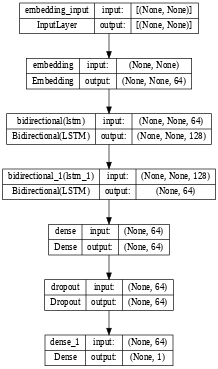

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=48)

**Training the model**

In [ ]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset, validation_steps=30)

Epoch 1/5
391/391 [==============================] - 1991s 5s/step - loss: 0.7180 - accuracy: 0.6042 - val_loss: 0.5684 - val_accuracy: 0.7224
Epoch 2/5
391/391 [==============================] - 1945s 5s/step - loss: 0.6111 - accuracy: 0.7094 - val_loss: 0.5636 - val_accuracy: 0.7141
Epoch 3/5
391/391 [==============================] - 1961s 5s/step - loss: 0.5801 - accuracy: 0.7350 - val_loss: 0.6797 - val_accuracy: 0.7328
Epoch 4/5
391/391 [==============================] - 1930s 5s/step - loss: 0.5039 - accuracy: 0.8043 - val_loss: 0.7314 - val_accuracy: 0.7328
Epoch 5/5
391/391 [==============================] - 1859s 5s/step - loss: 0.5327 - accuracy: 0.7685 - val_loss: 0.9885 - val_accuracy: 0.6469


**Test for Accuracy**

391/391 [==============================] - 417s 1s/step - loss: 0.9730 - accuracy: 0.6362
Test Loss: 0.9729747772216797
Test Accuracy: 0.6362000107765198


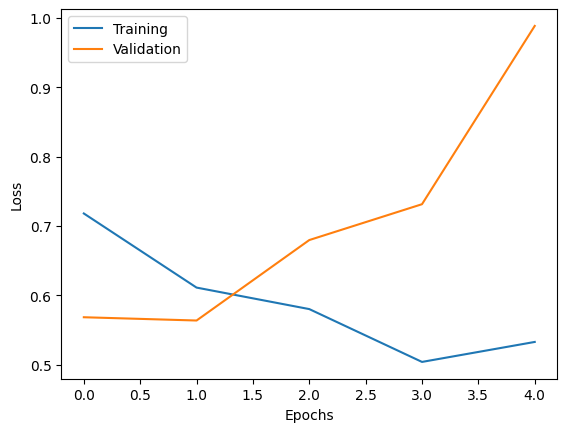

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec


def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  print("Prediction Score: ", predictions)
  output = ""
  if predictions[0][0] >= 0.5: output = "POSITIVE"
  elif predictions[0][0] <= -1: output = "NEGATIVE"
  else: output = "NEUTRAL"

  return output


# **Prediction with Sample Sentiments**

In [ ]:
sample_pred_text = ('The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 2s 2s/step
Prediction Score:  [[0.7646632]]
POSITIVE


In [ ]:
sample_pred_text = ('This movie is awesome. The acting was incredicable. Highly recommend')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 2s 2s/step
Prediction Score:  [[0.9162318]]
POSITIVE


In [ ]:
sample_pred_text = ('This movie was so so. The acting was medicore. Kind of recommend')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 27ms/step
Prediction Score:  [[0.5458297]]
POSITIVE


In [ ]:
sample_pred_text = ['The plot is fantastic',
           'The movie was cool and thrilling',
           'one of the worst films I have ever seen']
for s in sample_pred_text:
  predictions = sample_predict(s, pad = False)
  print(predictions)

1/1 [==============================] - 0s 23ms/step
Prediction Score:  [[0.6340761]]
POSITIVE
1/1 [==============================] - 0s 24ms/step
Prediction Score:  [[0.6469572]]
POSITIVE
1/1 [==============================] - 0s 26ms/step
Prediction Score:  [[0.10035239]]
NEUTRAL


In [ ]:
# John Wick: Chapter 4 (2023) STAR COMMENT
sample_pred_text = ("""I wasn't with Baba Yaga when he started his journey of
vengeance but I'm happy that I was with him in The End. Director Chad Stahelski
and writer David Kolstad have given us this amazing franchise. Keanu Reeves made
John Wick character immortal after his Matrix role Neo Anderson. A fully action
pack thriller with abundance of Guns & Swords and also some minor weapons like
a Dog, a pencil and a poker card. According to some sources John Wick has
killed 140 in this film which makes his total from chapter 1 to 4, 77+128+94+140=439.
Now that's some monstrosity of few weeks. He was like no less than a superhuman,
got hit by running cars 4 times, fell from third floor and also fell from long
stairs from top to bottom but still stands and finish the job.  Music by Tyler
Bates & Joel J. Richard is marvelous and songs are good so.

Speaking of cast, Keanu Reeves has given dangerous performance upto this date,
Ian McShane was also good, Donnie Yen was superb, he played a blind assassin
named Caine, Shamier Anderson role was fine, Bill Skarsgård was a well villain ,
(I like his suits very much), loved Laurence Fishburne, Hiroyuki Sanada's role
was little and he geve his best, Marko Zaror has larger role here and I was really
hoping to see him in one-on-one fight against John Wick (which happened but not
the way I imagined), I didn't recognise Scott Adkins here (same as that I didn't
recognise Colin Farrell in The Batman) and Rest in Peace Lance Reddick 🙏.""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 97ms/step
Prediction Score:  [[0.55321056]]
POSITIVE


In [ ]:
# John Wick: Chapter 4 (2023) STAR COMMENT
sample_pred_text = ("""Damn, John Wick Chapter 4 (JWCH4) is the ultimate
action movie with epic sequences. If you're tired of slow-motion films,
this is a must-see. You have to see this movie! It's possibly the greatest
action film ever made. Trust me, I've seen a lot of action movies. It's the
best I've ever watched.

JWCH4 is a must-see movie for extreme-action fans out there. This movie features
breathtaking camera work, including incredible aerial shots (that one with
slitted 9MM in Sig-MPX, it was so dope) and unique camera angles. And The sets
are awesome too including the mirror gallery to the art museum and the Continental,
dope. The lighting and set arrangements are also top-notch, with club and strobe
lights giving a badass ambiance. The car drift and fight scenes are impeccably
choreographed, making for an adrenaline-fueled viewing experience. Don't miss
out on this extreme action-packed film.

Boundary heat increased in each movie - from 5 million in the first to 50 million
in the latest, leading to its demise in John's hand.

Guys, the choreography in this movie is insane. I was so into it that I
didn't even blink twice. I'm a huge action movie fan ever since Transporter 2,
and let me tell you, this movie blew me away.""")
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 94ms/step
Prediction Score:  [[0.3861422]]
NEUTRAL


In [ ]:
# Suzume (2022) STAR COMMENT
sample_pred_text = ("""OMG!! Suzume is HANDS DOWN THE MOST INCREDIBLE MASTERPIECE
FROM Makoto Shinkai so far. Shinkai tends to give his works open endings that
leave so much to the audience’s imagination and they’re usually quite bittersweet.
Absolutely LOVED Suzume’s journey with Souta as they not only work together to save
Japan from the earthquakes, which, by the way, is undoubtedly a sensitive topic
to touch upon, but also explore more of themselves as a person throughout the adventure.

What’s more, the secondary characters are pretty unforgettable with their unique
personalities and funny banters. Although the ending may be a wee bit abrupt since
there’s a twist I never see coming, the more I ponder on the connection of THAT ending
and the entire movie, the more sense everything makes.

Hence, I’d HIGHLY RECOMMEND watching SUZUME if you haven’t.  Needless to say, Shinkai’s
works are all much appreciated and he just takes his mastermind up a notch by breathing
life into SUZUME and the whole storyline. Lastly, the soundtrack is soulfully melodic and
the lyrics are beyond meaningful. All in all, go watch SUZUME, y’all, and you can thank
me later!!!""")
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 80ms/step
Prediction Score:  [[0.5435804]]
POSITIVE


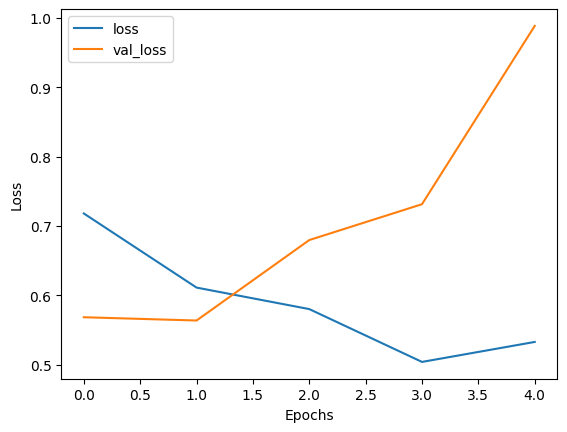

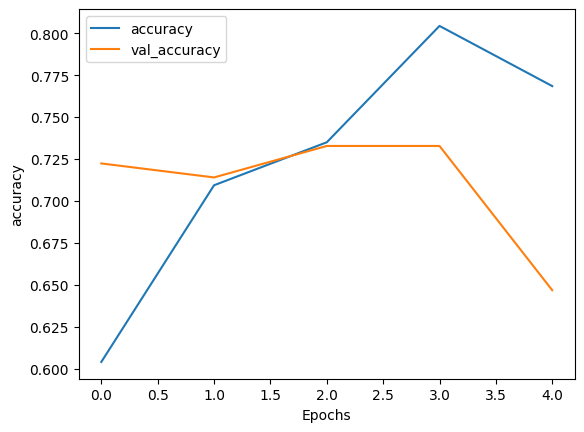

In [ ]:
hist = history.history

plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print('\n\n')
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'], '')
plt.legend(labels=["accuracy", 'val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()
